In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

df_flights = df_cleaned_drop_IQR

### Feature: `df_cleaned_drop_IF`

- Dropped the following columns due to irrelevance or redundancy:
  - `from_airport_code`
  - `dest_airport_code`
  - `airline_number`
  - `flight_number`
  - `currency`
  - `co2_emissions`
  - `avg_co2_emission_for_this_route`
  - `co2_percentage`
  - `scan_date`

- Converted `departure_time` and `arrival_time` (e.g., `2022-05-02 16:00:00`, `2022-05-04 06:00:00`) into categorical time slots:
  - `Early_Morning`
  - `Morning`
  - `Afternoon`
  - `Evening`
  - `Night`


In [2]:
# Drop specified columns
df_flights = df_flights.drop(columns=[
    'from_airport_code',
    'dest_airport_code',
    'airline_number',
    'flight_number',
    'currency',
    'co2_emissions',
    'avg_co2_emission_for_this_route',
    'co2_percentage',
    'scan_date'
])

# Convert duration from minutes to hours (assuming 'duration' is in minutes)
df_flights['duration'] = df_flights['duration'] / 60

In [3]:
import pandas as pd

# Define a function to convert hour to time of day
def time_of_day(hour):
    if 0 <= hour < 5:
        return 'Early_Morning'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert strings to datetime if necessary
df_flights['departure_time'] = pd.to_datetime(df_flights['departure_time'])
df_flights['arrival_time'] = pd.to_datetime(df_flights['arrival_time'])

# Apply the function to get time of day categories
df_flights['departure_time_of_day'] = df_flights['departure_time'].dt.hour.apply(time_of_day)
df_flights['arrival_time_of_day'] = df_flights['arrival_time'].dt.hour.apply(time_of_day)

# Drop the original datetime columns if no longer needed
df_flights = df_flights.drop(columns=['departure_time', 'arrival_time'])


In [4]:
df_flights

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day
0,Austria,Taiwan,Airbus A330|Boeing 777,[Turkish Airlines],24.833333,1,794.0,Morning,Evening
1,China,Germany,Boeing 777|Airbus A320,[China Eastern| Lufthansa],41.666667,1,1660.0,Early_Morning,Afternoon
2,Belgium,Brazil,Airbus A320|Boeing 747|Boeing 737,[Brussels Airlines| Lufthansa| Gol],26.750000,2,826.0,Evening,Afternoon
3,Brazil,Zurich,Airbus A320|Boeing 777,[LATAM| SWISS],34.333333,1,1339.0,Evening,Morning
4,Austria,Panama,Airbus A320|Boeing 767|Boeing 737,[Austrian| United],22.266667,2,1277.0,Afternoon,Early_Morning
...,...,...,...,...,...,...,...,...,...
99994,Belgium,Panama,Airbus A330|Boeing 737,[Brussels Airlines| COPA],16.483333,1,1364.0,Morning,Evening
99995,Dublin,Columbia,Airbus A320|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.983333,2,1989.0,Morning,Early_Morning
99996,Dublin,Brazil,Airbus A320|Airbus A320|Boeing 777,[Aer Lingus| Iberia| LATAM],20.250000,2,736.0,Afternoon,Early_Morning
99997,Denmark,United States,Boeing 737|Airbus A330|Airbus A321,[KLM| Delta],18.016667,2,1023.0,Morning,Afternoon


In [5]:
df_flights.columns

Index(['from_country', 'dest_country', 'aircraft_type', 'airline_name',
       'duration', 'stops', 'price', 'departure_time_of_day',
       'arrival_time_of_day'],
      dtype='object')

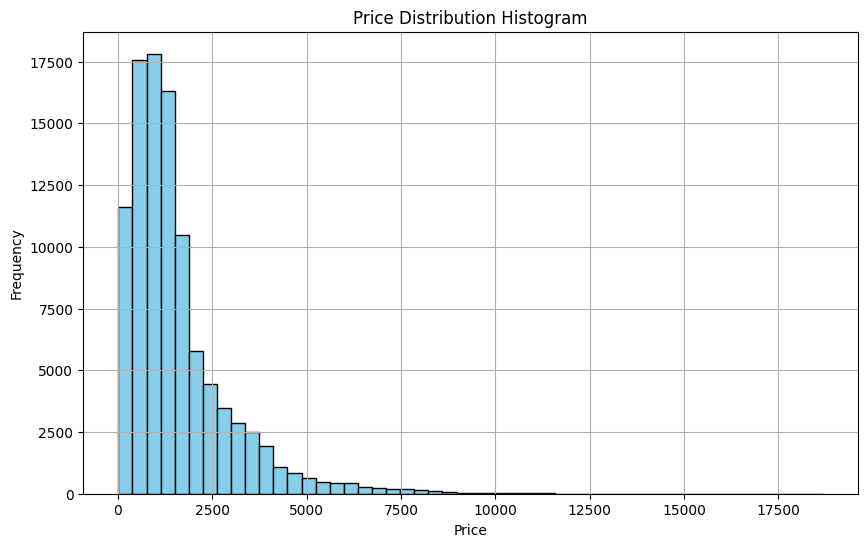

In [6]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df_flights['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


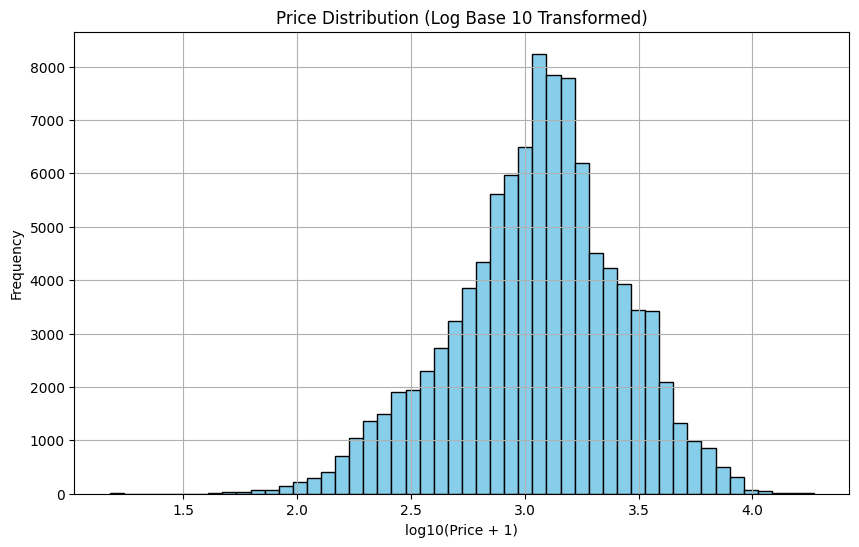

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log base 10 transformation
log_prices = np.log10(df_flights['price'] + 1)

plt.figure(figsize=(10, 6))
plt.hist(log_prices, bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution (Log Base 10 Transformed)')
plt.xlabel('log10(Price + 1)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [8]:
df_flights['log_price'] = np.log1p(df_flights['price'])

### Feature Engineering

In [9]:
df_flights

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day,log_price
0,Austria,Taiwan,Airbus A330|Boeing 777,[Turkish Airlines],24.833333,1,794.0,Morning,Evening,6.678342
1,China,Germany,Boeing 777|Airbus A320,[China Eastern| Lufthansa],41.666667,1,1660.0,Early_Morning,Afternoon,7.415175
2,Belgium,Brazil,Airbus A320|Boeing 747|Boeing 737,[Brussels Airlines| Lufthansa| Gol],26.750000,2,826.0,Evening,Afternoon,6.717805
3,Brazil,Zurich,Airbus A320|Boeing 777,[LATAM| SWISS],34.333333,1,1339.0,Evening,Morning,7.200425
4,Austria,Panama,Airbus A320|Boeing 767|Boeing 737,[Austrian| United],22.266667,2,1277.0,Afternoon,Early_Morning,7.153052
...,...,...,...,...,...,...,...,...,...,...
99994,Belgium,Panama,Airbus A330|Boeing 737,[Brussels Airlines| COPA],16.483333,1,1364.0,Morning,Evening,7.218910
99995,Dublin,Columbia,Airbus A320|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.983333,2,1989.0,Morning,Early_Morning,7.595890
99996,Dublin,Brazil,Airbus A320|Airbus A320|Boeing 777,[Aer Lingus| Iberia| LATAM],20.250000,2,736.0,Afternoon,Early_Morning,6.602588
99997,Denmark,United States,Boeing 737|Airbus A330|Airbus A321,[KLM| Delta],18.016667,2,1023.0,Morning,Afternoon,6.931472


In [10]:
airline_split = (
    df_flights['airline_name']
    .str.strip('[]')                      # remove brackets
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

# Step 2: Expand the list into 6 strings (pad with "None" as string)
airline_expanded = airline_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_flights[f'airline_{i+1}'] = airline_expanded.apply(lambda x: x[i])
# df_flights.drop(columns=['airline_name'], inplace=True)

In [11]:
aircraft_split = (
    df_flights['aircraft_type']
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

aircraft_expanded = aircraft_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_flights[f'aircraft_{i+1}'] = aircraft_expanded.apply(lambda x: x[i])
# df_flights.drop(columns=['aircraft_type'], inplace=True)

In [12]:
df_flights

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day,log_price,...,airline_3,airline_4,airline_5,airline_6,aircraft_1,aircraft_2,aircraft_3,aircraft_4,aircraft_5,aircraft_6
0,Austria,Taiwan,Airbus A330|Boeing 777,[Turkish Airlines],24.833333,1,794.0,Morning,Evening,6.678342,...,None,None,None,None,Airbus A330,Boeing 777,None,None,None,None
1,China,Germany,Boeing 777|Airbus A320,[China Eastern| Lufthansa],41.666667,1,1660.0,Early_Morning,Afternoon,7.415175,...,None,None,None,None,Boeing 777,Airbus A320,None,None,None,None
2,Belgium,Brazil,Airbus A320|Boeing 747|Boeing 737,[Brussels Airlines| Lufthansa| Gol],26.750000,2,826.0,Evening,Afternoon,6.717805,...,Gol,None,None,None,Airbus A320,Boeing 747,Boeing 737,None,None,None
3,Brazil,Zurich,Airbus A320|Boeing 777,[LATAM| SWISS],34.333333,1,1339.0,Evening,Morning,7.200425,...,None,None,None,None,Airbus A320,Boeing 777,None,None,None,None
4,Austria,Panama,Airbus A320|Boeing 767|Boeing 737,[Austrian| United],22.266667,2,1277.0,Afternoon,Early_Morning,7.153052,...,None,None,None,None,Airbus A320,Boeing 767,Boeing 737,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,Belgium,Panama,Airbus A330|Boeing 737,[Brussels Airlines| COPA],16.483333,1,1364.0,Morning,Evening,7.218910,...,None,None,None,None,Airbus A330,Boeing 737,None,None,None,None
99995,Dublin,Columbia,Airbus A320|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.983333,2,1989.0,Morning,Early_Morning,7.595890,...,None,None,None,None,Airbus A320,Airbus A320neo,Boeing 787,None,None,None
99996,Dublin,Brazil,Airbus A320|Airbus A320|Boeing 777,[Aer Lingus| Iberia| LATAM],20.250000,2,736.0,Afternoon,Early_Morning,6.602588,...,LATAM,None,None,None,Airbus A320,Airbus A320,Boeing 777,None,None,None
99997,Denmark,United States,Boeing 737|Airbus A330|Airbus A321,[KLM| Delta],18.016667,2,1023.0,Morning,Afternoon,6.931472,...,None,None,None,None,Boeing 737,Airbus A330,Airbus A321,None,None,None


In [13]:
import category_encoders as ce

# Get object columns
cat_cols = df_flights.select_dtypes(include='object').columns

# Initialize and apply target encoder
encoder = ce.TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_flights[cat_cols], df_flights['price'])

# Merge the encoded values back into the original DataFrame
df_flights = pd.concat([df_flights, df_encoded.add_suffix('_mean_encoded')], axis=1)


1. Smoothed Target Mean Encoding (Best for avoiding overfitting)
Instead of directly mapping each category to its mean price, smooth the mean using overall average to prevent overfitting — especially helpful when some categories have very few samples.

In [14]:
def smooth_target_encoding(df, column, target, weight=100):
    global_mean = df[target].mean()
    agg = df.groupby(column)[target].agg(['mean', 'count'])
    smoothing = (agg['count'] * agg['mean'] + weight * global_mean) / (agg['count'] + weight)
    return df[column].map(smoothing)


In [15]:
# df_flights['departure_time_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'departure_time_of_day', 'price'
# )
# df_flights['arrival_time_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'arrival_time_of_day', 'price'
# )
# df_flights['from_country_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'from_country', 'price'
# )
# df_flights['dest_country_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'dest_country', 'price'
# )
# df_flights['airline_name_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'airline_name', 'price'
# )
# df_flights['aircraft_type_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'aircraft_type', 'price'
# )
# df_flights['airline_1_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'airline_1', 'price'
# )
# df_flights['airline_2_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'airline_2', 'price'
# )
# df_flights['airline_3_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'airline_3', 'price'
# )
# df_flights['airline_4_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'airline_4', 'price'
# )
# df_flights['airline_5_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'airline_5', 'price'
# )
# df_flights['airline_6_smooth_encoded'] = smooth_target_encoding(
#     df_flights, 'airline_6', 'price'
# )



In [16]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split

# # Separate features and target
# X = df_flights.drop('price', axis=1)
# y = df_flights['price']

# # Select categorical columns to encode
# categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# # Define the encoder
# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# # Create a column transformer to apply OneHotEncoder to categorical columns only
# column_transformer = ColumnTransformer(
#     transformers=[('cat', ohe, categorical_cols)],
#     remainder='passthrough'  # Keep the rest of the columns as is
# )

# X_encoded = column_transformer.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [17]:
df_flights

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day,log_price,...,airline_3_mean_encoded,airline_4_mean_encoded,airline_5_mean_encoded,airline_6_mean_encoded,aircraft_1_mean_encoded,aircraft_2_mean_encoded,aircraft_3_mean_encoded,aircraft_4_mean_encoded,aircraft_5_mean_encoded,aircraft_6_mean_encoded
0,Austria,Taiwan,Airbus A330|Boeing 777,[Turkish Airlines],24.833333,1,794.0,Morning,Evening,6.678342,...,1464.036651,1564.600154,1569.798116,1569.835978,1853.922728,1939.551188,984.286603,1478.724712,1564.51728,1569.520075
1,China,Germany,Boeing 777|Airbus A320,[China Eastern| Lufthansa],41.666667,1,1660.0,Early_Morning,Afternoon,7.415175,...,1464.036651,1564.600154,1569.798116,1569.835978,1847.591804,1279.599487,984.286603,1478.724712,1564.51728,1569.520075
2,Belgium,Brazil,Airbus A320|Boeing 747|Boeing 737,[Brussels Airlines| Lufthansa| Gol],26.750000,2,826.0,Evening,Afternoon,6.717805,...,1729.506502,1564.600154,1569.798116,1569.835978,1605.893900,1947.530156,1844.420309,1478.724712,1564.51728,1569.520075
3,Brazil,Zurich,Airbus A320|Boeing 777,[LATAM| SWISS],34.333333,1,1339.0,Evening,Morning,7.200425,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,1939.551188,984.286603,1478.724712,1564.51728,1569.520075
4,Austria,Panama,Airbus A320|Boeing 767|Boeing 737,[Austrian| United],22.266667,2,1277.0,Afternoon,Early_Morning,7.153052,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,2046.957320,1844.420309,1478.724712,1564.51728,1569.520075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,Belgium,Panama,Airbus A330|Boeing 737,[Brussels Airlines| COPA],16.483333,1,1364.0,Morning,Evening,7.218910,...,1464.036651,1564.600154,1569.798116,1569.835978,1853.922728,1380.118773,984.286603,1478.724712,1564.51728,1569.520075
99995,Dublin,Columbia,Airbus A320|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.983333,2,1989.0,Morning,Early_Morning,7.595890,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,1136.540332,2259.065029,1478.724712,1564.51728,1569.520075
99996,Dublin,Brazil,Airbus A320|Airbus A320|Boeing 777,[Aer Lingus| Iberia| LATAM],20.250000,2,736.0,Afternoon,Early_Morning,6.602588,...,2324.782377,1564.600154,1569.798116,1569.835978,1605.893900,1279.599487,2322.351308,1478.724712,1564.51728,1569.520075
99997,Denmark,United States,Boeing 737|Airbus A330|Airbus A321,[KLM| Delta],18.016667,2,1023.0,Morning,Afternoon,6.931472,...,1464.036651,1564.600154,1569.798116,1569.835978,1538.731554,1609.940547,1843.575743,1478.724712,1564.51728,1569.520075


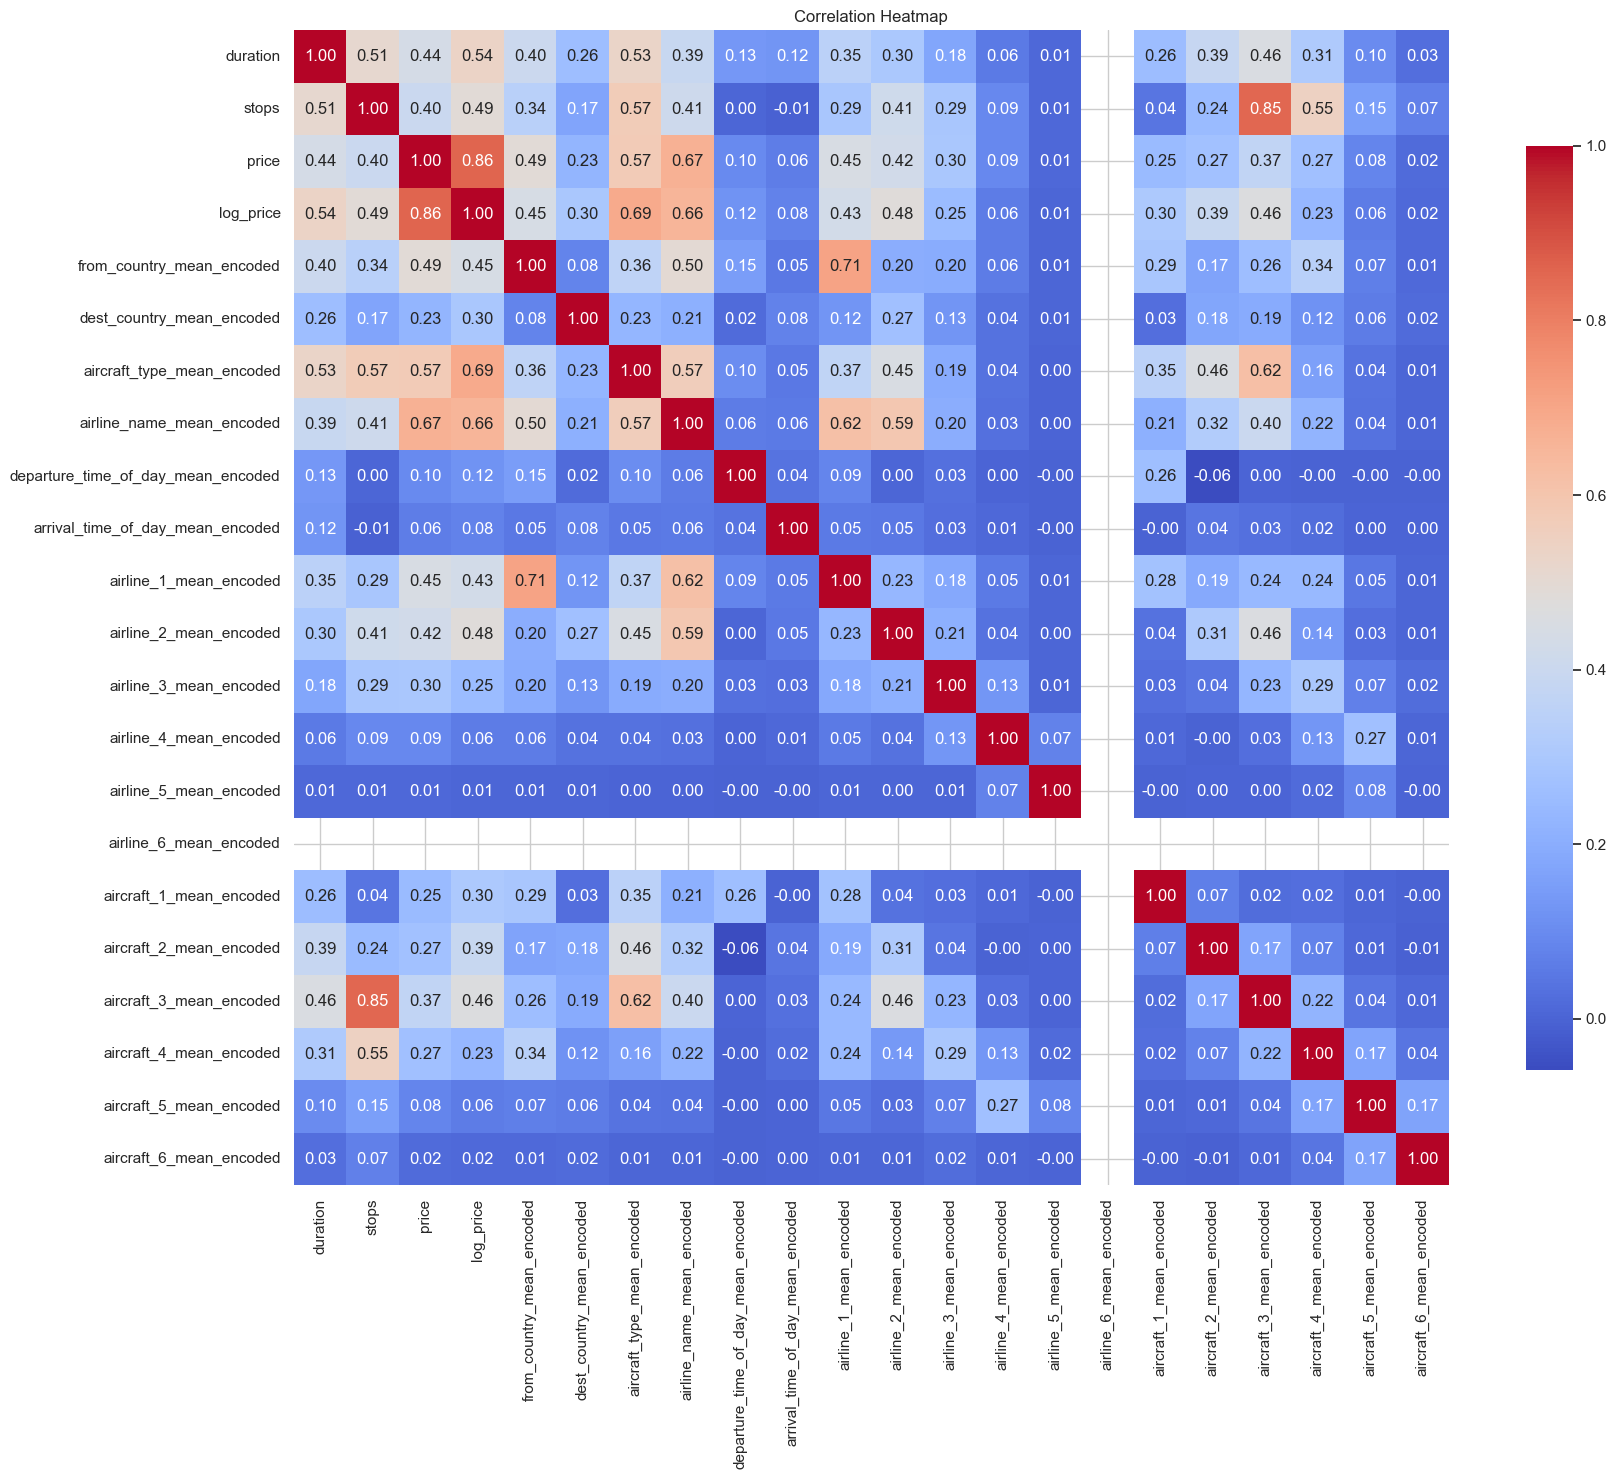

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df_flights.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

### How Does the Ticket Price vary with the number of 'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'?

C:\Users\punna\AppData\Local\Temp\ipykernel_64096\4129525034.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flights, x=col, y='price', palette='Set3')


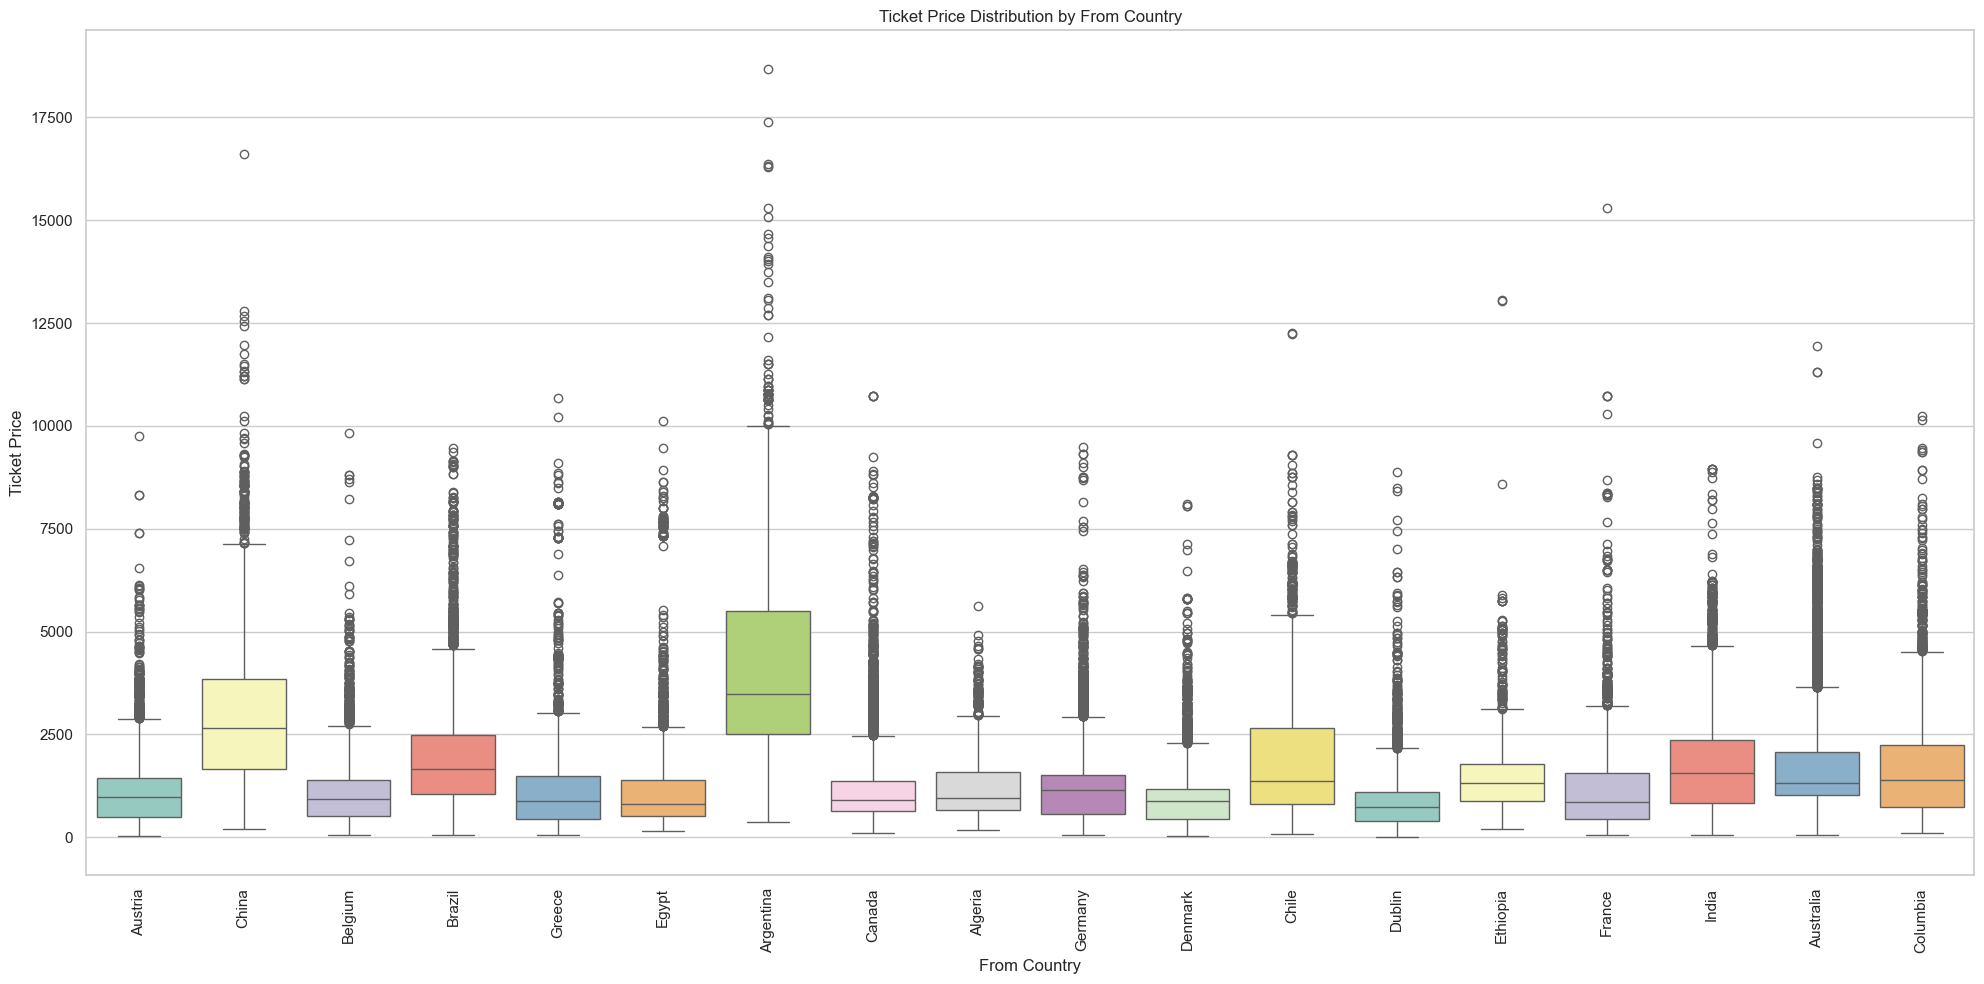

C:\Users\punna\AppData\Local\Temp\ipykernel_64096\4129525034.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flights, x=col, y='price', palette='Set3')


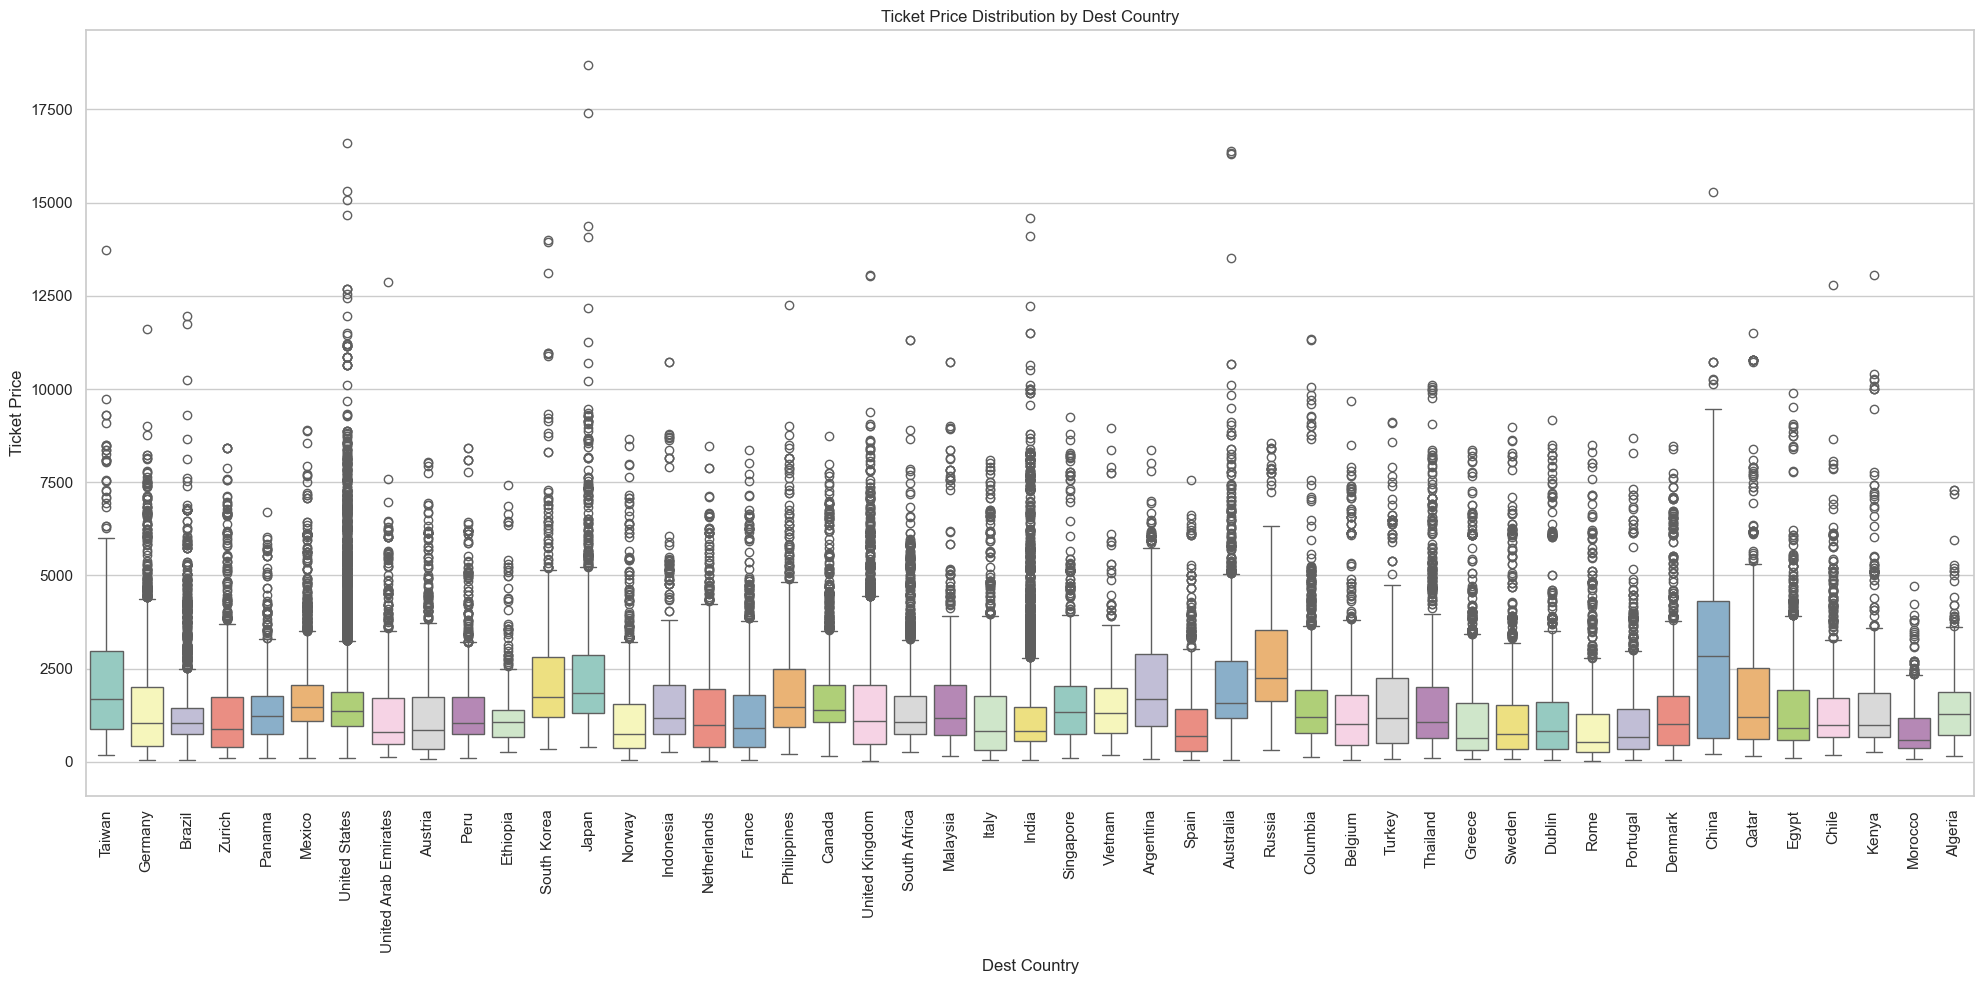

C:\Users\punna\AppData\Local\Temp\ipykernel_64096\4129525034.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flights, x=col, y='price', palette='Set3')


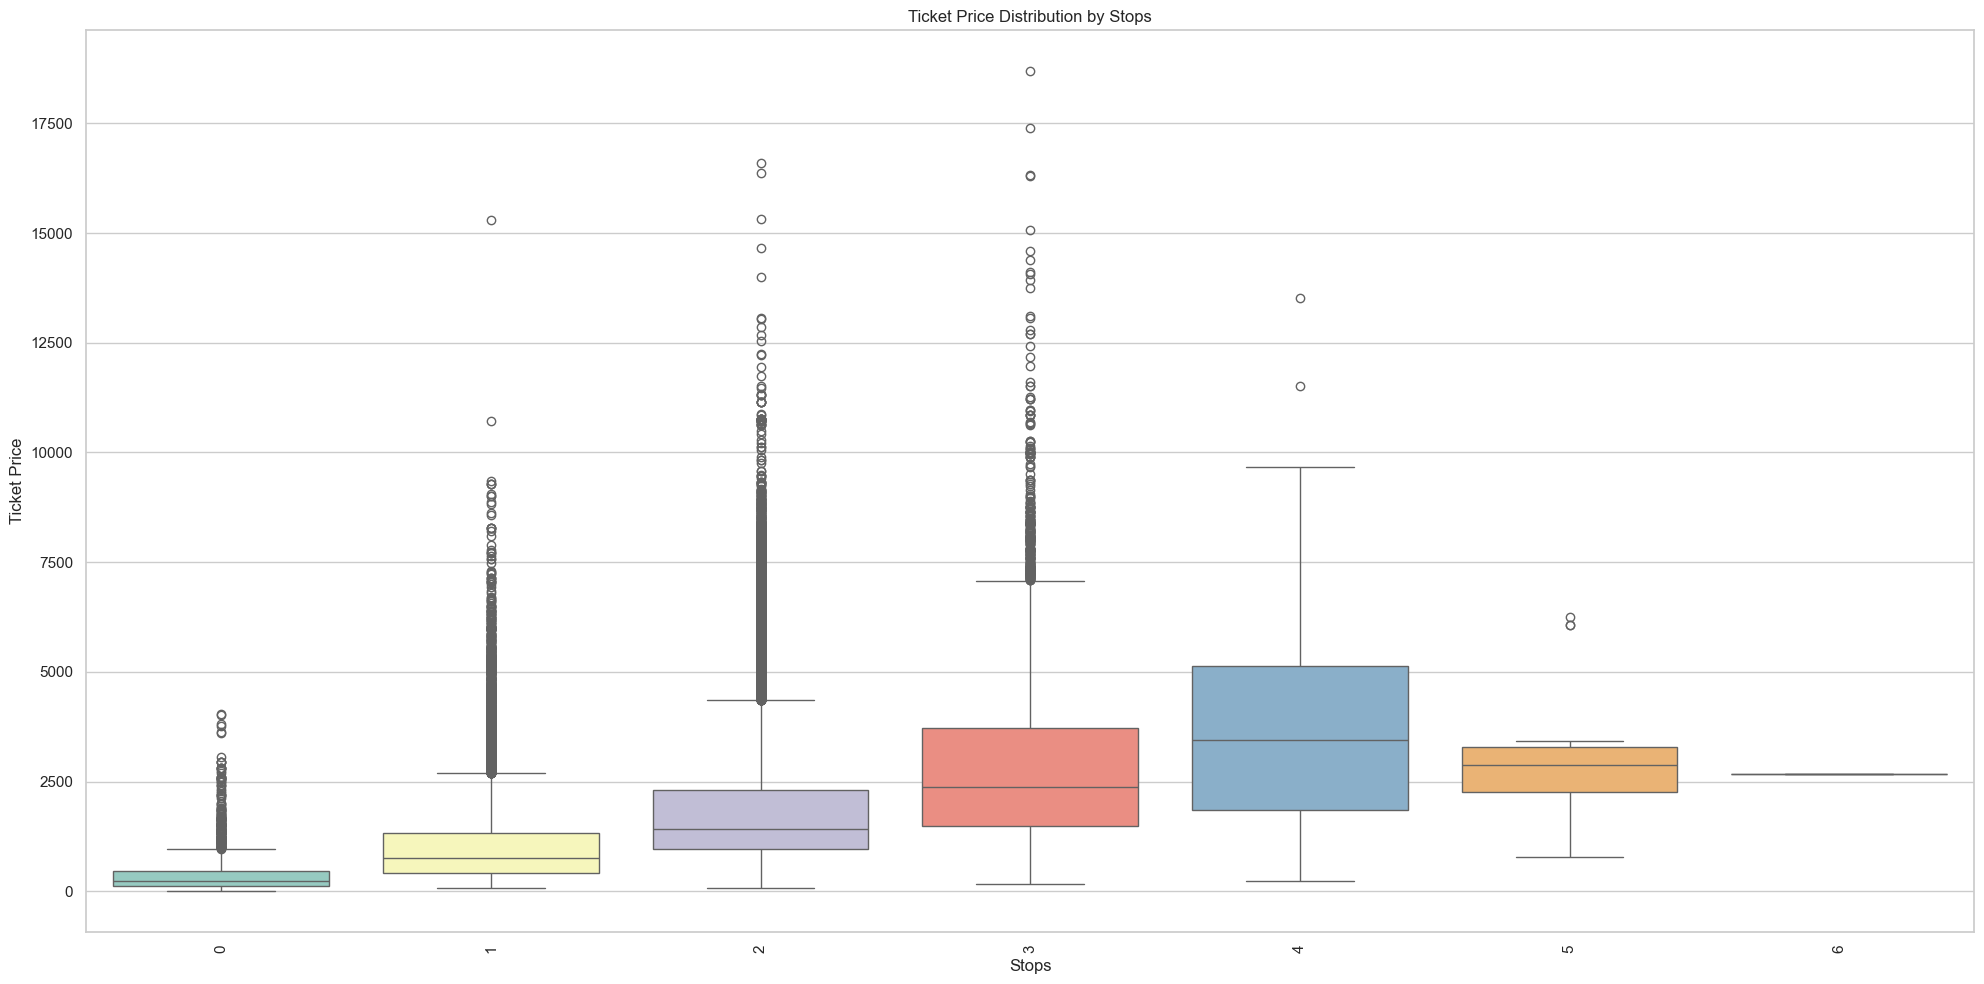

C:\Users\punna\AppData\Local\Temp\ipykernel_64096\4129525034.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flights, x=col, y='price', palette='Set3')


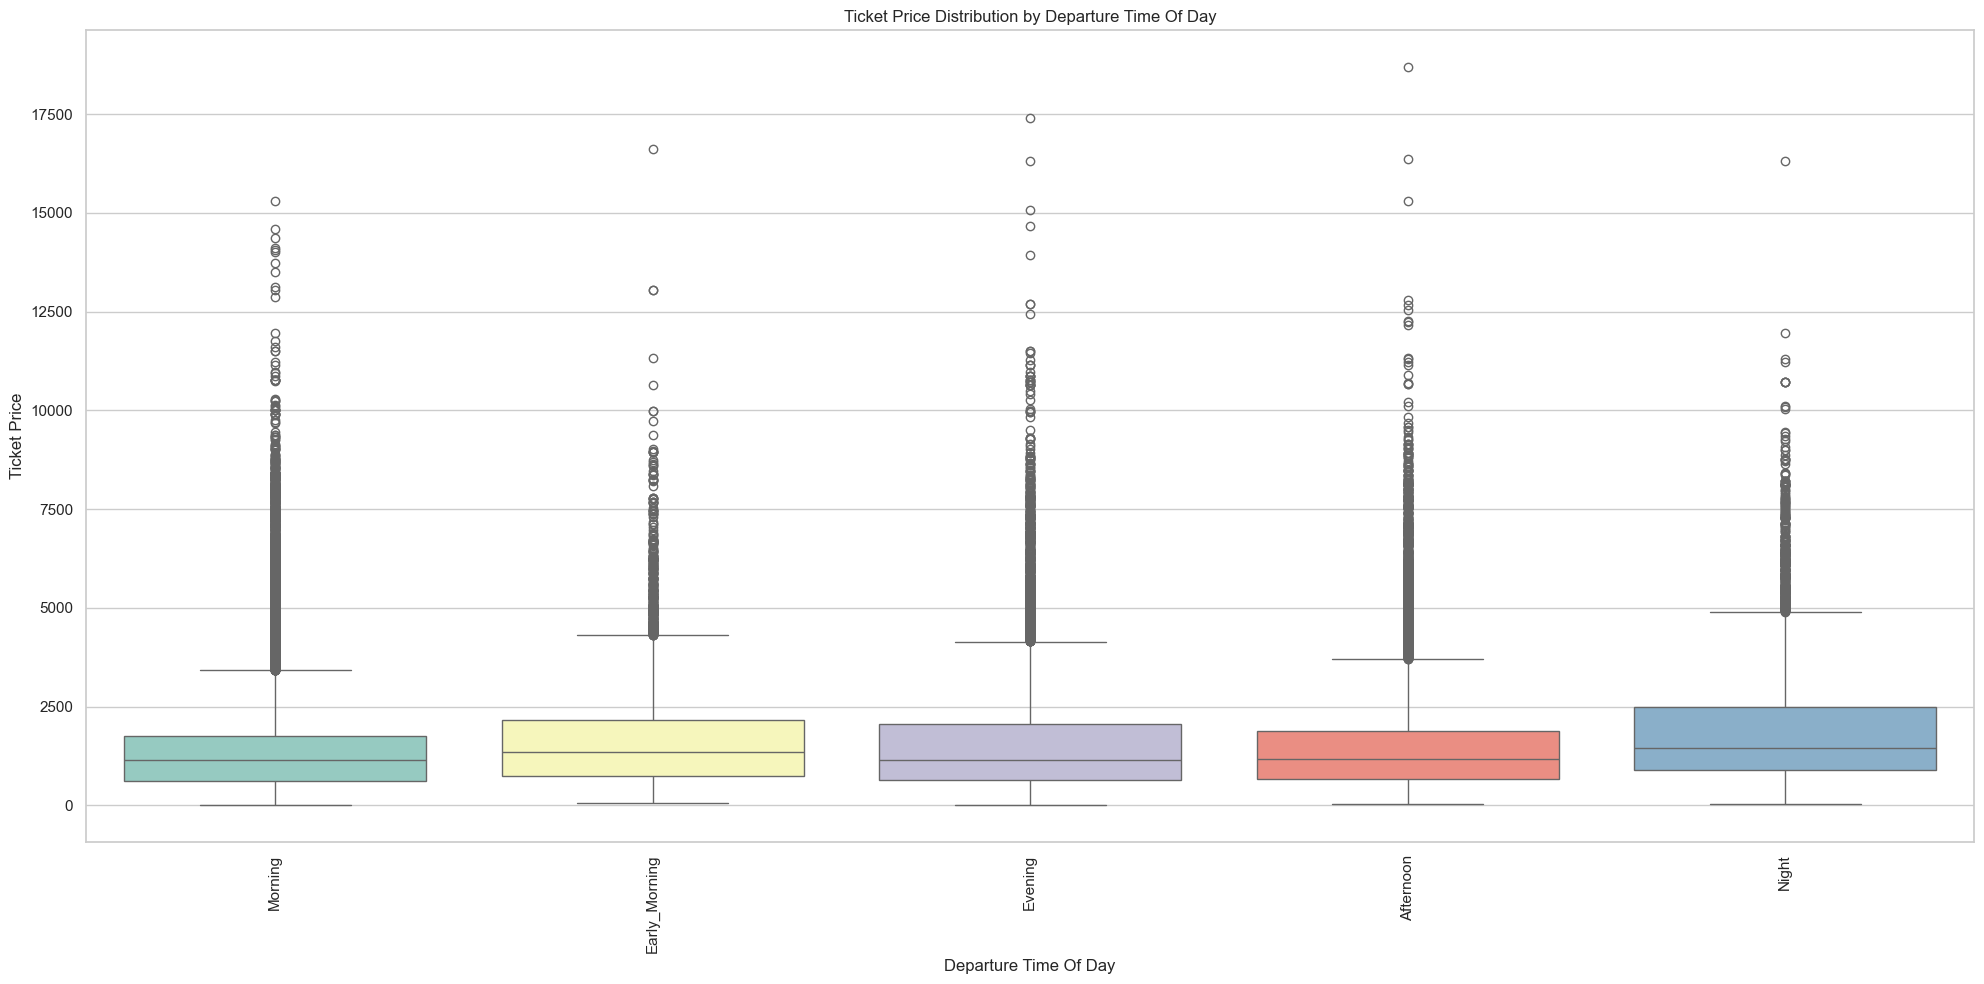

C:\Users\punna\AppData\Local\Temp\ipykernel_64096\4129525034.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flights, x=col, y='price', palette='Set3')


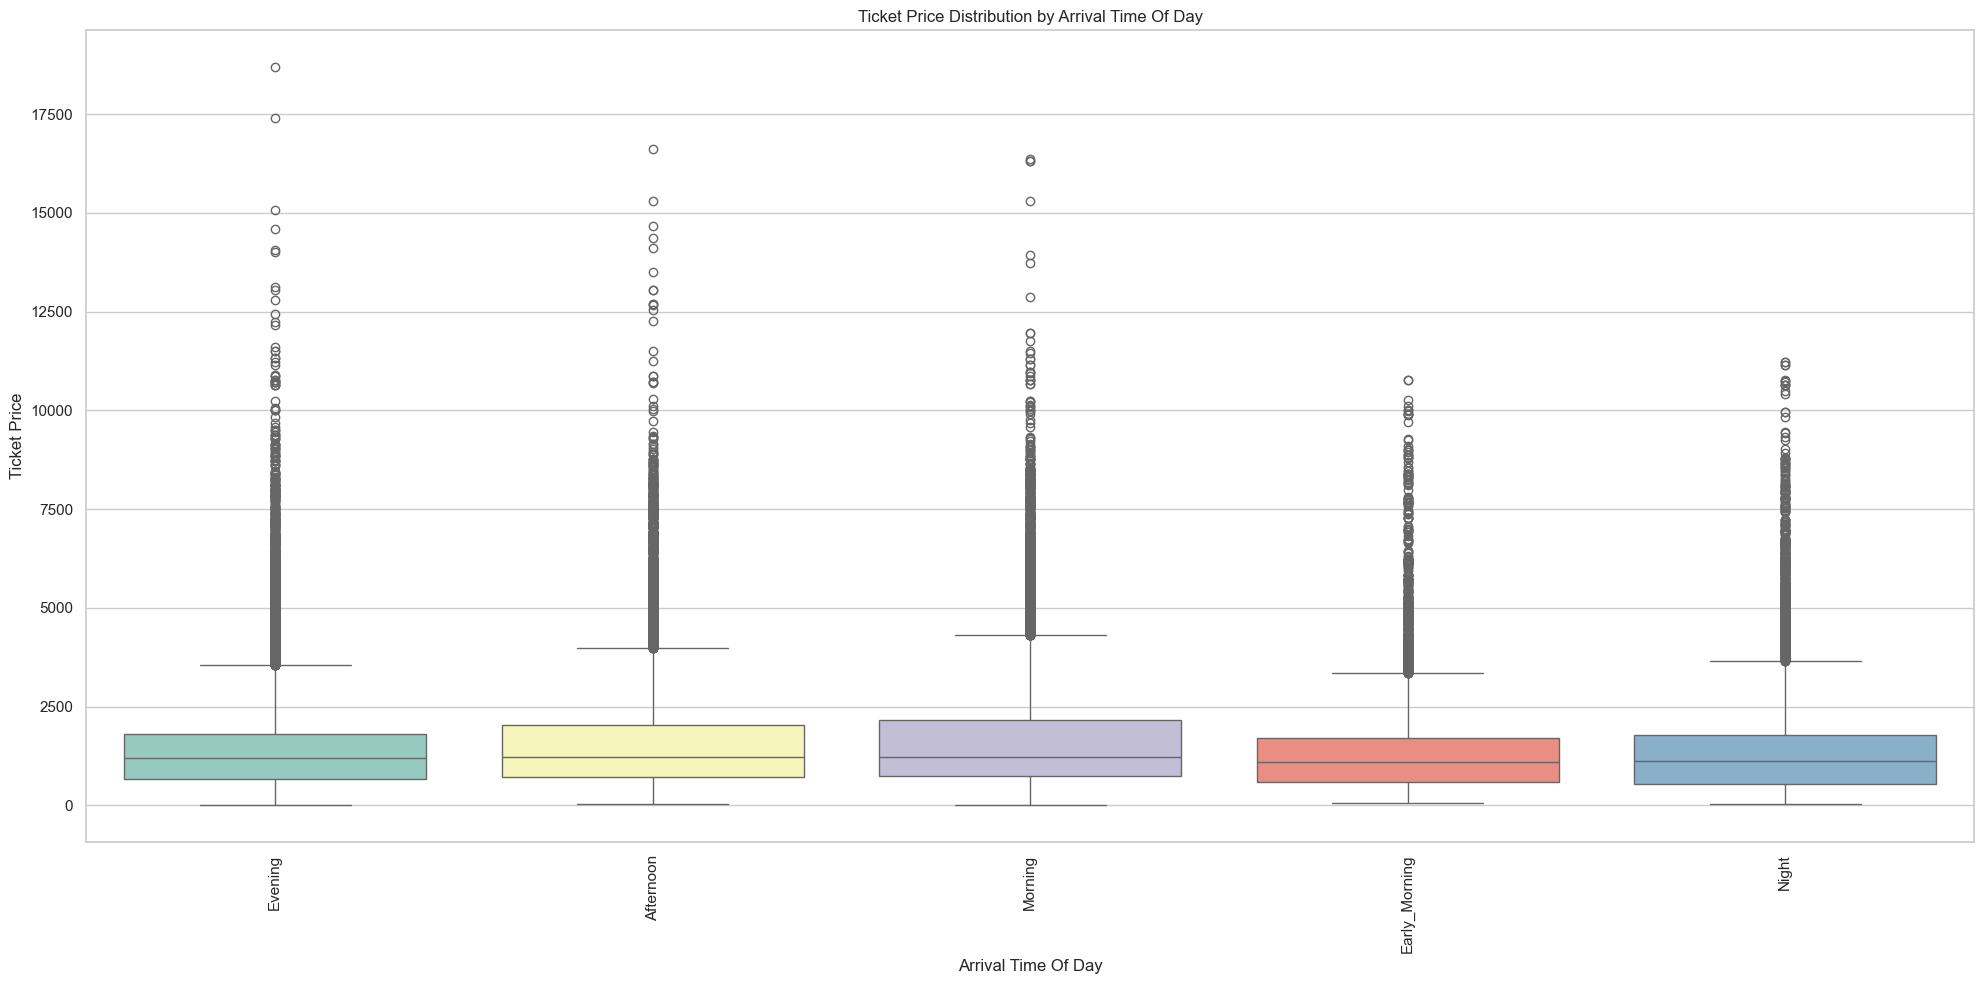

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to plot against price
categorical_cols = [
    'from_country', 'dest_country', 'stops', 'departure_time_of_day', 'arrival_time_of_day'
]

# Plotting boxplots for each categorical feature vs. price
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    sns.boxplot(data=df_flights, x=col, y='price', palette='Set3')
    plt.xticks(rotation=90)
    plt.title(f'Ticket Price Distribution by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Ticket Price')
    plt.tight_layout()
    plt.show()


### Model Linear Regression

In [20]:
# from sklearn.preprocessing import LabelEncoder

df = df_flights.select_dtypes(include=['number']).copy()  

# le=LabelEncoder()
# for col in df.columns:
#     if df[col].dtype=='object':
#         df[col]=le.fit_transform(df[col])

In [21]:
df

,duration,stops,price,log_price,from_country_mean_encoded,dest_country_mean_encoded,aircraft_type_mean_encoded,airline_name_mean_encoded,departure_time_of_day_mean_encoded,arrival_time_of_day_mean_encoded,...,airline_3_mean_encoded,airline_4_mean_encoded,airline_5_mean_encoded,airline_6_mean_encoded,aircraft_1_mean_encoded,aircraft_2_mean_encoded,aircraft_3_mean_encoded,aircraft_4_mean_encoded,aircraft_5_mean_encoded,aircraft_6_mean_encoded
0,24.833333,1,794.0,6.678342,1107.247528,2214.107914,1185.538462,837.540034,1464.325853,1521.331222,...,1464.036651,1564.600154,1569.798116,1569.835978,1853.922728,1939.551188,984.286603,1478.724712,1564.51728,1569.520075
1,41.666667,1,1660.0,7.415175,2876.265681,1480.413208,1450.095238,3124.039088,1664.548905,1609.237167,...,1464.036651,1564.600154,1569.798116,1569.835978,1847.591804,1279.599487,984.286603,1478.724712,1564.51728,1569.520075
2,26.750000,2,826.0,6.717805,1072.431730,1349.232911,1419.172402,1456.844228,1586.328076,1609.237167,...,1729.506502,1564.600154,1569.798116,1569.835978,1605.893900,1947.530156,1844.420309,1478.724712,1564.51728,1569.520075
3,34.333333,1,1339.0,7.200425,1937.311808,1335.913153,1450.552480,3258.704179,1586.328076,1675.805666,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,1939.551188,984.286603,1478.724712,1564.51728,1569.520075
4,22.266667,2,1277.0,7.153052,1107.247528,1443.098963,2141.891076,1419.906250,1538.124601,1471.240017,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,2046.957320,1844.420309,1478.724712,1564.51728,1569.520075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,16.483333,1,1364.0,7.218910,1072.431730,1443.098963,1247.753626,1549.470727,1464.325853,1521.331222,...,1464.036651,1564.600154,1569.798116,1569.835978,1853.922728,1380.118773,984.286603,1478.724712,1564.51728,1569.520075
99995,22.983333,2,1989.0,7.595890,884.337779,1611.921424,1601.557574,1455.221498,1464.325853,1471.240017,...,1464.036651,1564.600154,1569.798116,1569.835978,1605.893900,1136.540332,2259.065029,1478.724712,1564.51728,1569.520075
99996,20.250000,2,736.0,6.602588,884.337779,1349.232911,2687.085492,1438.087474,1538.124601,1471.240017,...,2324.782377,1564.600154,1569.798116,1569.835978,1605.893900,1279.599487,2322.351308,1478.724712,1564.51728,1569.520075
99997,18.016667,2,1023.0,6.931472,978.078644,1649.839459,1364.745948,1161.281971,1464.325853,1609.237167,...,1464.036651,1564.600154,1569.798116,1569.835978,1538.731554,1609.940547,1843.575743,1478.724712,1564.51728,1569.520075


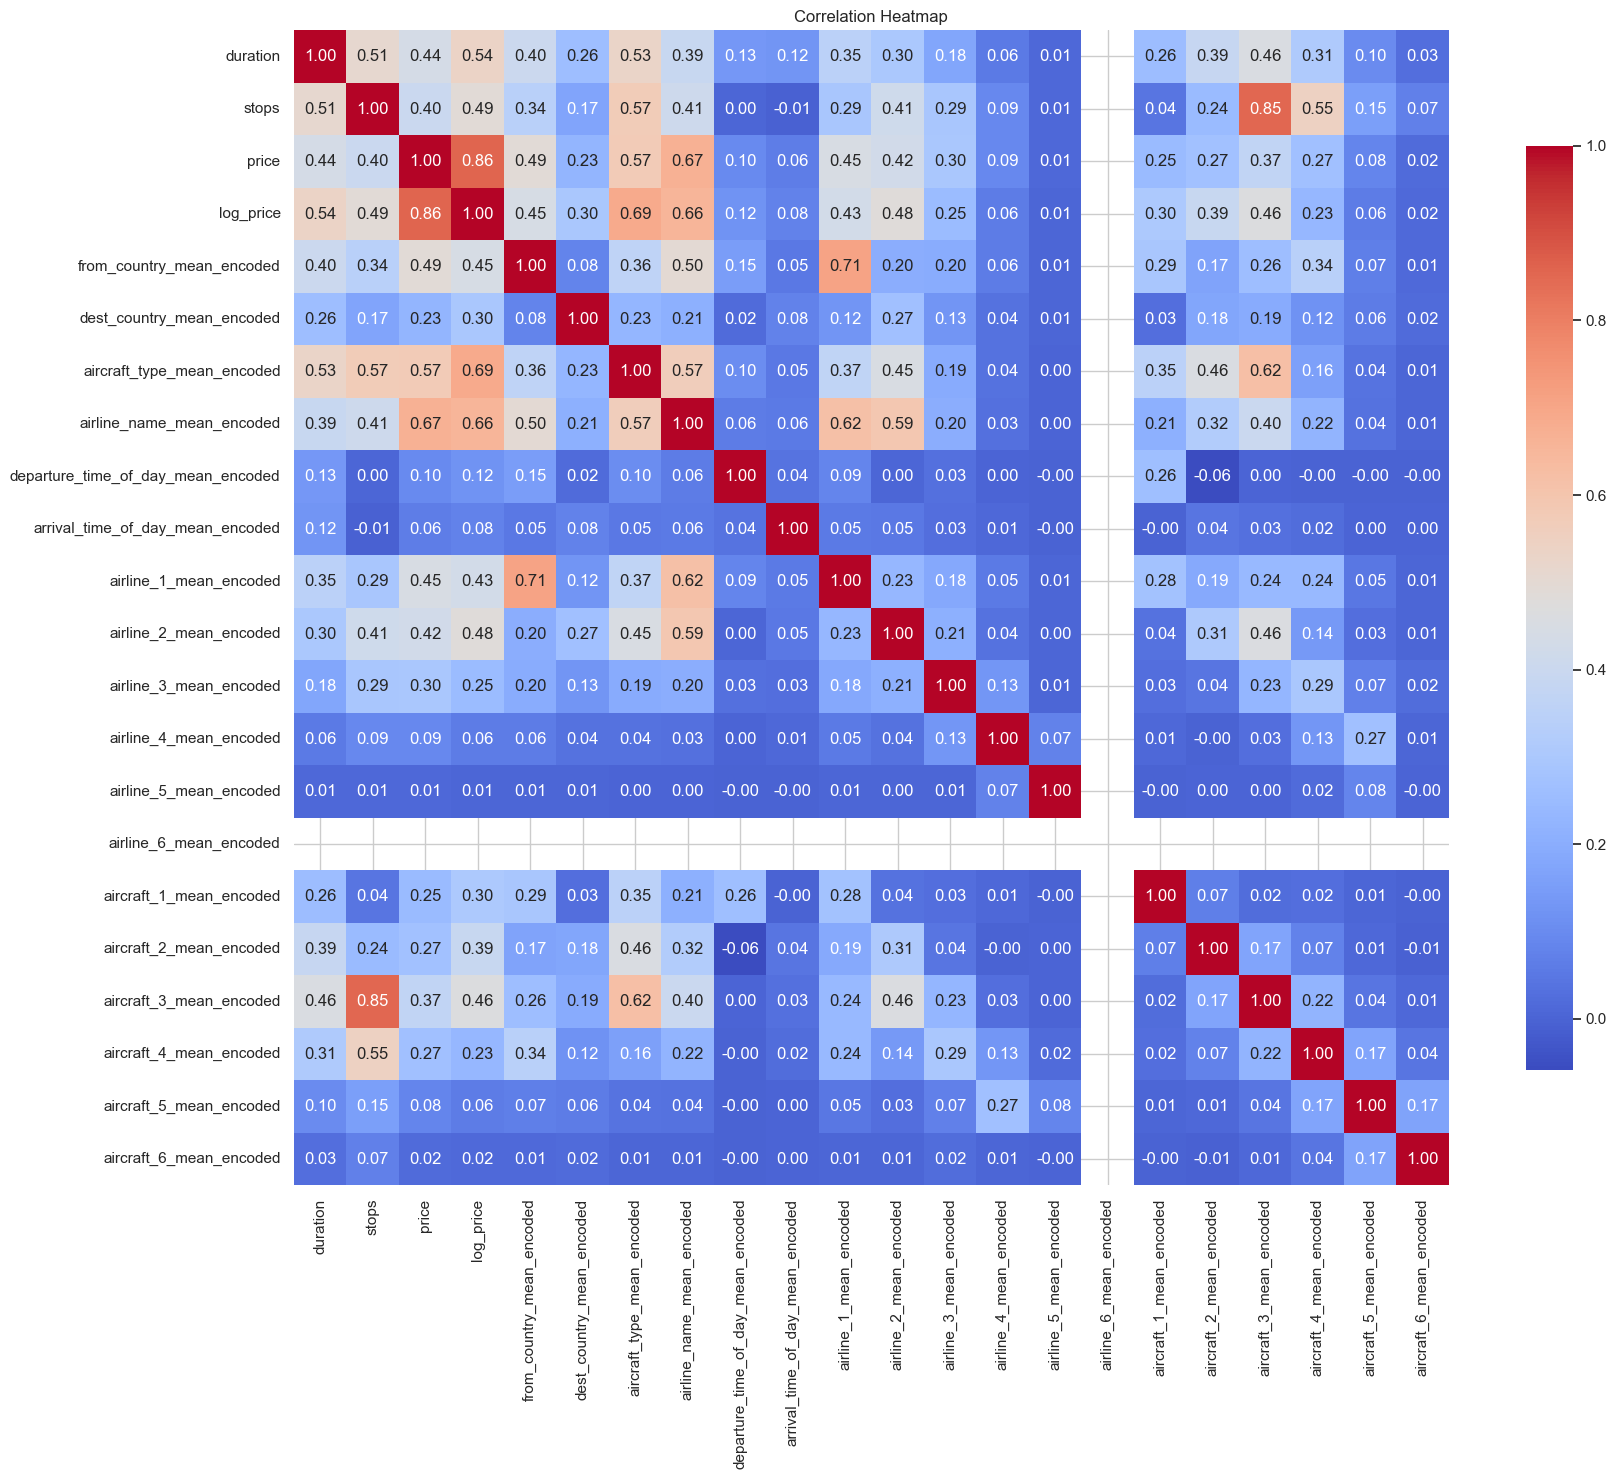

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [23]:
df.columns

Index(['duration', 'stops', 'price', 'log_price', 'from_country_mean_encoded',
       'dest_country_mean_encoded', 'aircraft_type_mean_encoded',
       'airline_name_mean_encoded', 'departure_time_of_day_mean_encoded',
       'arrival_time_of_day_mean_encoded', 'airline_1_mean_encoded',
       'airline_2_mean_encoded', 'airline_3_mean_encoded',
       'airline_4_mean_encoded', 'airline_5_mean_encoded',
       'airline_6_mean_encoded', 'aircraft_1_mean_encoded',
       'aircraft_2_mean_encoded', 'aircraft_3_mean_encoded',
       'aircraft_4_mean_encoded', 'aircraft_5_mean_encoded',
       'aircraft_6_mean_encoded'],
      dtype='object')

In [24]:
# storing the Dependent Variables in X and Independent Variable in Y
# 'departure_time_of_day','arrival_time_of_day'
x=df.drop(columns=['price', 'log_price'])

y=df['price']

### Train Test Split

In [25]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((69999, 20), (30000, 20), (69999,), (30000,))

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
mmscaler = MinMaxScaler(feature_range=(0, 1))

# Fit only on x_train and transform both
x_train_scaled = mmscaler.fit_transform(x_train)
x_test_scaled = mmscaler.transform(x_test)

# Convert back to DataFrame and preserve original index
X_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
X_test = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)


In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((69999, 20), (30000, 20), (69999,), (30000,))

### Trainning

Linear Regression:
- R²: 0.5631, MSE: 824071.5765
------------------------------
Decision Tree:
- R²: 0.5807, MSE: 790716.2774
------------------------------
XGBoost:
- R²: 0.7489, MSE: 473589.8216
------------------------------
KNN Regressor:
- R²: 0.6314, MSE: 695101.4349
------------------------------
Bagging Regressor:
- R²: 0.7512, MSE: 469236.1818
------------------------------
CatBoost:
- R²: 0.7437, MSE: 483395.0722
------------------------------


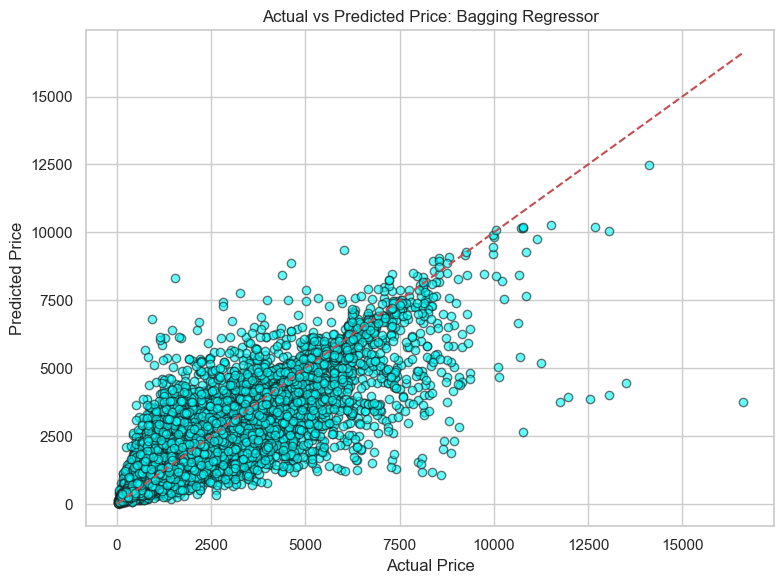

In [28]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# # Drop rows with missing values in selected columns
# df = df.dropna(subset=['price'])  # adjust if needed

# # Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42)
}

# Store results
results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = (r2, mse)
    print(f"{name}:")
    print(f"- R²: {r2:.4f}, MSE: {mse:.4f}")
    print("-" * 30)

# Plot: Actual vs Predicted for the best model (highest R²)
best_model_name = max(results, key=lambda k: results[k][0])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Price: {best_model_name}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest Regressor:")
print(f"- R²: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
print("-" * 30)

Random Forest Regressor:
- R²: 0.6957, MSE: 573818.0820
------------------------------


In [30]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Extra Trees Regressor:")
print(f"- R²: {r2_score(y_test, y_pred):.4f}, MSE: {mean_squared_error(y_test, y_pred):.4f}")
print("-" * 30)


Extra Trees Regressor:
- R²: 0.6775, MSE: 608208.3500
------------------------------


In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Add ElasticNet to your models dictionary
models["ElasticNet"] = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)  # l1_ratio = alpha between L1 and L2

# Then it works in your loop like other models

from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'l1_ratio': [0.1, 0.5, 0.9]
}

grid = GridSearchCV(ElasticNet(random_state=42), param_grid, scoring='r2', cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best ElasticNet Parameters:", grid.best_params_)
print("Best ElasticNet R²:", grid.best_score_)
print("Best ElasticNet MSE:", mean_squared_error(y_test, best_model.predict(X_test)))



Best ElasticNet Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}
Best ElasticNet R²: 0.5580712352397327
Best ElasticNet MSE: 829278.4792943879


In [32]:
# # Predict on the test set
# y_pred_best = best_model.predict(X_test)

# # Create a copy of X_test to avoid modifying the original df
# df_test = X_test.copy()

# # Add actual and predicted prices
# df_test['Actual Price'] = y_test.values
# df_test['Predicted Price'] = y_pred_best

# # Optional: see the head of the result
# df_test.head(30)


### Hypertunning

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Define models
base_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "KNN Regressor": KNeighborsRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42)
}

# Evaluate baseline models
baseline_results = {}
baseline_models = {}

for name, model in base_models.items():
    print(f"\nTraining baseline: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    baseline_results[name] = (r2, mse)
    baseline_models[name] = model

    print(f"{name} - Baseline R²: {r2:.4f}, Baseline MSE: {mse:.4f}")



Training baseline: Linear Regression
Linear Regression - Baseline R²: 0.5631, Baseline MSE: 824071.5765

Training baseline: Decision Tree
Decision Tree - Baseline R²: 0.5807, Baseline MSE: 790716.2774

Training baseline: XGBoost
XGBoost - Baseline R²: 0.7489, Baseline MSE: 473589.8216

Training baseline: KNN Regressor
KNN Regressor - Baseline R²: 0.6314, Baseline MSE: 695101.4349

Training baseline: CatBoost
CatBoost - Baseline R²: 0.7437, Baseline MSE: 483395.0722

Training baseline: Bagging Regressor
Bagging Regressor - Baseline R²: 0.7512, Baseline MSE: 469236.1818


In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grids
param_grids = {
    "Linear Regression": {},  # No tunable hyperparameters usually
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "subsample": [0.6, 0.8, 1.0]
    },
    "KNN Regressor": {
        "n_neighbors": [3, 5, 7, 9],
        "weights": ['uniform', 'distance']
    },
    "CatBoost": {
        "iterations": [100, 200],
        "depth": [4, 6, 10],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "Bagging Regressor": {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.75, 1.0],
        "max_features": [0.5, 0.75, 1.0]
    }
}

# Store tuned models and results
best_models = {}
tuned_results = {}

# Tuning loop
for name, model in base_models.items():
    print(f"\nTuning: {name}")
    param_grid = param_grids[name]
    if param_grid:
        search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_model = model
        print(f"No parameters to tune for {name}")

    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    best_models[name] = best_model
    tuned_results[name] = (r2, mse)

    print(f"{name} - Tuned R²: {r2:.4f}, Tuned MSE: {mse:.4f}")



Tuning: Linear Regression
No parameters to tune for Linear Regression
Linear Regression - Tuned R²: 0.5631, Tuned MSE: 824071.5765

Tuning: Decision Tree
Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree - Tuned R²: 0.6512, Tuned MSE: 657793.7778

Tuning: XGBoost
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2}
XGBoost - Tuned R²: 0.7517, Tuned MSE: 468221.7173

Tuning: KNN Regressor


c:\Users\punna\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN Regressor: {'weights': 'distance', 'n_neighbors': 9}
KNN Regressor - Tuned R²: 0.6716, Tuned MSE: 619406.5726

Tuning: CatBoost
Best parameters for CatBoost: {'learning_rate': 0.1, 'iterations': 200, 'depth': 10}
CatBoost - Tuned R²: 0.7401, Tuned MSE: 490168.7560

Tuning: Bagging Regressor
Best parameters for Bagging Regressor: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 0.75}
Bagging Regressor - Tuned R²: 0.7799, Tuned MSE: 415101.7535


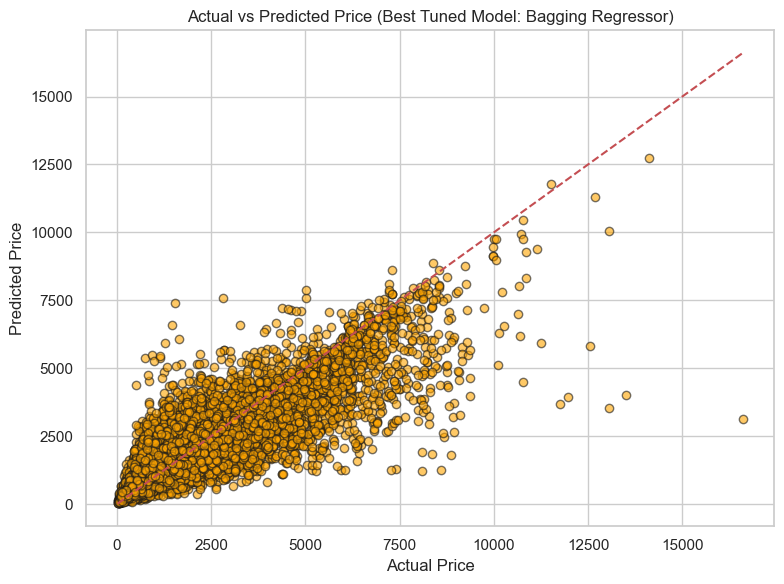

In [35]:
# Plot best model based on tuned R² score
best_model_name = max(tuned_results, key=lambda k: tuned_results[k][0])
y_pred_best = best_models[best_model_name].predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted Price (Best Tuned Model: {best_model_name})")
plt.grid(True)
plt.tight_layout()
plt.show()


### Ensemble Method

In [36]:
import pandas as pd

    # "Linear Regression": LinearRegression(),
    # "Decision Tree": DecisionTreeRegressor(random_state=42),
    # "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    # "KNN Regressor": KNeighborsRegressor(),
    # "Bagging Regressor": BaggingRegressor(random_state=42),
    # "CatBoost": CatBoostRegressor(verbose=0, loss_function='RMSE', random_state=42)

predictions = {
    name: model.predict(X_test) for name, model in best_models.items()
    if name in ["XGBoost", "CatBoost", "Linear Regression", "Decision Tree", "KNN Regressor", "Bagging Regressor"]
}

pred_df = pd.DataFrame(predictions)
correlation = pred_df.corr()
print("Prediction Correlation Matrix:\n", correlation)


Prediction Correlation Matrix:
                    Linear Regression  Decision Tree   XGBoost  KNN Regressor  \
Linear Regression           1.000000       0.886867  0.874965       0.847329   
Decision Tree               0.886867       1.000000  0.925816       0.862640   
XGBoost                     0.874965       0.925816  1.000000       0.901114   
KNN Regressor               0.847329       0.862640  0.901114       1.000000   
CatBoost                    0.901400       0.940850  0.981663       0.911393   
Bagging Regressor           0.870561       0.921291  0.964167       0.933573   

                   CatBoost  Bagging Regressor  
Linear Regression  0.901400           0.870561  
Decision Tree      0.940850           0.921291  
XGBoost            0.981663           0.964167  
KNN Regressor      0.911393           0.933573  
CatBoost           1.000000           0.965896  
Bagging Regressor  0.965896           1.000000  


In [37]:
from sklearn.ensemble import VotingRegressor

# Use only top-performing or complementary models
# Example: Give more weight to XGBoost and CatBoost

#  Best: 0.7705 
#        ('XGBoost', best_models["XGBoost"]),
# ('Bagging Regressor', best_models["Bagging Regressor"]),
ensemble_model = VotingRegressor(
    estimators=[ 
        ('XGBoost', best_models["XGBoost"]),
        ('Bagging Regressor', best_models["Bagging Regressor"]),
        # ('CatBoost', best_models["CatBoost"]),
        # ('Linear Regression', best_models["Linear Regression"]),
        # ('Decision Tree', best_models["Decision Tree"]),
        # ('KNN Regressor', best_models["KNN Regressor"])
    ],
)

ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_const...
                                          learning_rate=0.2, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('Bagging Regressor',
                             BaggingRegressor(max_features=0.75,
                                              n_estimators=100,
                                              random_state=42))])

In [38]:
# Predict and evaluate R²
y_pred_ensemble = ensemble_model.predict(X_test)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble R² Score: {r2_ensemble:.4f}")

Ensemble R² Score: 0.7789
